In [23]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [24]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

# Scale features
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)



In [25]:
# Initialize and train model with increased max_iter
lr = LogisticRegression(C=100.0, random_state=1, max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# Print results for C=100.0
print("Results for C=100.0:")
print('Misclassified training samples: %d' % (y_train != y_train_pred).sum())
print('Misclassified test samples: %d' % (y_test != y_test_pred).sum())
print('Training accuracy: %.3f' % accuracy_score(y_train, y_train_pred))
print('Test accuracy: %.3f' % accuracy_score(y_test, y_test_pred))


Results for C=100.0:
Misclassified training samples: 2
Misclassified test samples: 6
Training accuracy: 0.995
Test accuracy: 0.965


In [30]:
# ==============================================================================
# Train models with different C values and collect accuracies
# ==============================================================================

# Create array of c values from -8 to 10
c_values = np.arange(-8, 11)
C_values = 10.0 ** c_values

# Lists to store accuracies
train_accuracies = []
test_accuracies = []

# Train model for each C value
for C in C_values:
    # Initialize and train model
    lr = LogisticRegression(C=C, solver="liblinear", random_state=1, max_iter=1000)
    lr.fit(X_train_scaled, y_train)
    
    # Calculate and store accuracies
    train_acc = accuracy_score(y_train, lr.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, lr.predict(X_test_scaled))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

     # Calculate accuracies
    train_acc = accuracy_score(y_train, lr.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, lr.predict(X_test_scaled))
    
    # Print results
    print(f"{C:<8.2f}\t{train_acc:.3f}\t\t{test_acc:.3f}")

0.00    	0.940		0.924
0.00    	0.940		0.924
0.00    	0.940		0.924
0.00    	0.940		0.924
0.00    	0.942		0.924
0.00    	0.952		0.930
0.01    	0.975		0.947
0.10    	0.990		0.965
1.00    	0.990		0.971
10.00   	0.992		0.959
100.00  	0.992		0.965
1000.00 	0.997		0.947
10000.00	1.000		0.947
100000.00	1.000		0.947
1000000.00	1.000		0.947
10000000.00	1.000		0.947
100000000.00	1.000		0.947
1000000000.00	1.000		0.947
10000000000.00	1.000		0.947


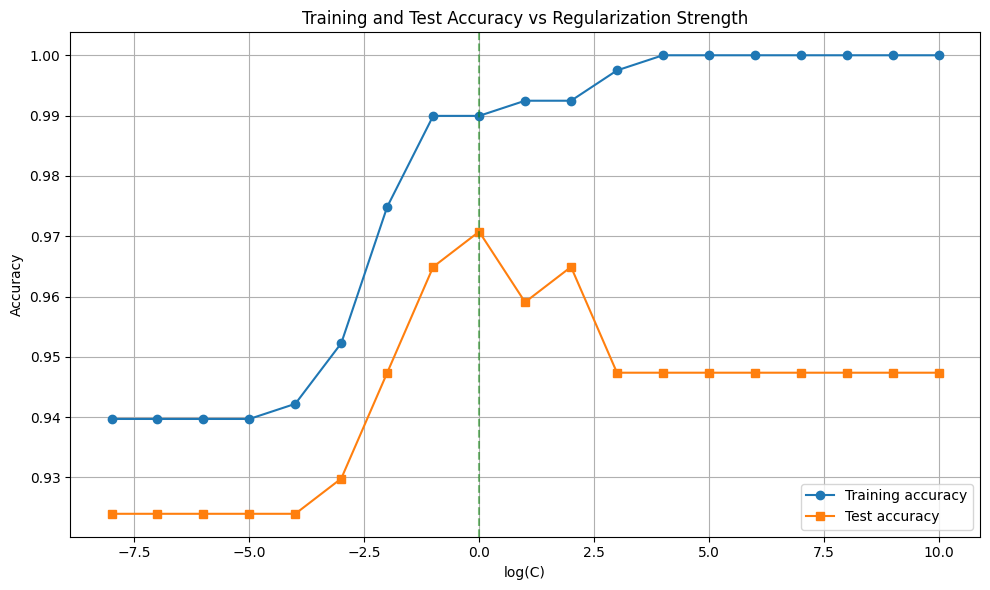


Best performance at C = 10^0
Best test accuracy: 0.971

Model behavior analysis:
Underfitting region: C < 10^-1 (strong regularization)
Good fit region: 10^-1 <= C <= 10^1
Overfitting region: C > 10^1 (weak regularization)


In [31]:
# ==============================================================================
# Plot results
# ==============================================================================

plt.figure(figsize=(10, 6))
plt.plot(c_values, train_accuracies, marker='o', label='Training accuracy')
plt.plot(c_values, test_accuracies, marker='s', label='Test accuracy')

plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy vs Regularization Strength')
plt.legend(loc='lower right')
plt.grid(True)

# Add vertical lines to highlight regions
best_c = c_values[np.argmax(test_accuracies)]
plt.axvline(x=best_c, color='g', linestyle='--', alpha=0.5, 
            label=f'Best C (10^{best_c})')

plt.tight_layout()
plt.show()

# Print best C value and its accuracy
print(f"\nBest performance at C = 10^{best_c}")
print(f"Best test accuracy: {max(test_accuracies):.3f}")

# Analyze overfitting and underfitting regions
print("\nModel behavior analysis:")
print("Underfitting region: C < 10^{:.0f} (strong regularization)".format(
    c_values[np.where(np.array(test_accuracies) > 0.95)[0][0]]))
print("Good fit region: 10^{:.0f} <= C <= 10^{:.0f}".format(
    c_values[np.where(np.array(test_accuracies) > 0.95)[0][0]],
    c_values[np.where(np.array(train_accuracies) >= 0.99)[0][0]]))
print("Overfitting region: C > 10^{:.0f} (weak regularization)".format(
    c_values[np.where(np.array(train_accuracies) >= 0.99)[0][0]]))